<a href="https://colab.research.google.com/github/Altemir1/Crypto-DL-Based-Trading-System/blob/main/market_wide_analysis_on_bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data collection

In [1]:
import pandas as pd

btc = pd.read_csv("BTC.csv")
btc

,date,ticker,open,high,low,close,volume
0,2010-07-14,BTC,0.058157,0.061588,0.048647,0.056402,2.615400e+02
1,2010-07-15,BTC,0.056403,0.067954,0.053969,0.057568,4.458000e+02
2,2010-07-16,BTC,0.058001,0.072220,0.057484,0.066492,4.972500e+02
3,2010-07-17,BTC,0.066500,0.077735,0.057418,0.065993,1.999000e+01
4,2010-07-18,BTC,0.066088,0.080858,0.064221,0.078814,7.513000e+01
...,...,...,...,...,...,...,...
5374,2025-03-31,BTC,82336.059346,83870.121349,81293.888561,82548.910961,2.900423e+10
5375,2025-04-01,BTC,82551.918729,85487.366123,82429.361993,85169.169589,2.817565e+10
5376,2025-04-02,BTC,85180.613040,88466.956959,82343.539107,82485.708371,4.758440e+10
5377,2025-04-03,BTC,82487.476424,83909.298365,81282.097863,83102.828207,3.685211e+10


Collecting data about securities

In [2]:
import yfinance as yf

tickers = ['^TNX', 'GC=F', '^GSPC', '^IXIC', '^VIX', 'DX-Y.NYB', 'CL=F']
data = yf.download(tickers, start="2014-01-01", end="2025-01-01", interval="1d", group_by='ticker', auto_adjust=False)
close_prices = pd.DataFrame({ticker: data[ticker]['Close'] for ticker in tickers})
close_prices

[*********************100%***********************]  7 of 7 completed


,^TNX,GC=F,^GSPC,^IXIC,^VIX,DX-Y.NYB,CL=F
Date,,,,,,,
2014-01-02,2.985,1225.000000,1831.979980,4143.069824,14.23,80.629997,95.440002
2014-01-03,2.995,1238.400024,1831.369995,4131.910156,13.76,80.790001,93.959999
2014-01-06,2.961,1237.800049,1826.770020,4113.680176,13.55,80.650002,93.430000
2014-01-07,2.937,1229.400024,1837.880005,4153.180176,12.92,80.830002,93.669998
2014-01-08,2.993,1225.300049,1837.489990,4165.609863,12.87,81.040001,92.330002
...,...,...,...,...,...,...,...
2024-12-24,4.591,2620.000000,6040.040039,20031.130859,14.27,108.260002,70.099998
2024-12-26,4.579,2638.800049,6037.589844,20020.359375,14.73,108.129997,69.620003
2024-12-27,4.619,2617.199951,5970.839844,19722.029297,15.95,108.000000,70.599998


In [3]:
ticker_names = {
    '^TNX': 'treasury_yield_10y',
    'GC=F': 'gold',
    '^GSPC': 'sp_500',
    '^IXIC': 'nasdaq',
    '^VIX': 'volatility_index',
    'DX-Y.NYB': 'dollar_index',
    'CL=F': 'wti'
}

close_prices.rename(columns=ticker_names, inplace=True)
close_prices

,treasury_yield_10y,gold,sp_500,nasdaq,volatility_index,dollar_index,wti
Date,,,,,,,
2014-01-02,2.985,1225.000000,1831.979980,4143.069824,14.23,80.629997,95.440002
2014-01-03,2.995,1238.400024,1831.369995,4131.910156,13.76,80.790001,93.959999
2014-01-06,2.961,1237.800049,1826.770020,4113.680176,13.55,80.650002,93.430000
2014-01-07,2.937,1229.400024,1837.880005,4153.180176,12.92,80.830002,93.669998
2014-01-08,2.993,1225.300049,1837.489990,4165.609863,12.87,81.040001,92.330002
...,...,...,...,...,...,...,...
2024-12-24,4.591,2620.000000,6040.040039,20031.130859,14.27,108.260002,70.099998
2024-12-26,4.579,2638.800049,6037.589844,20020.359375,14.73,108.129997,69.620003
2024-12-27,4.619,2617.199951,5970.839844,19722.029297,15.95,108.000000,70.599998


In [4]:
close_prices.rename({"Date":"date"}, inplace=True)

Adding weekends as stock market doesn't work on weekdays, but btc does

In [5]:
start_date = close_prices.index.min()
end_date = close_prices.index.max()
full_date_range = pd.date_range(start=start_date, end=end_date, freq='D')
prices_full = close_prices.reindex(full_date_range)
prices_full.ffill(inplace=True)

In [6]:
prices_full

,treasury_yield_10y,gold,sp_500,nasdaq,volatility_index,dollar_index,wti
2014-01-02,2.985,1225.000000,1831.979980,4143.069824,14.23,80.629997,95.440002
2014-01-03,2.995,1238.400024,1831.369995,4131.910156,13.76,80.790001,93.959999
2014-01-04,2.995,1238.400024,1831.369995,4131.910156,13.76,80.790001,93.959999
2014-01-05,2.995,1238.400024,1831.369995,4131.910156,13.76,80.790001,93.959999
2014-01-06,2.961,1237.800049,1826.770020,4113.680176,13.55,80.650002,93.430000
...,...,...,...,...,...,...,...
2024-12-27,4.619,2617.199951,5970.839844,19722.029297,15.95,108.000000,70.599998
2024-12-28,4.619,2617.199951,5970.839844,19722.029297,15.95,108.000000,70.599998
2024-12-29,4.619,2617.199951,5970.839844,19722.029297,15.95,108.000000,70.599998
2024-12-30,4.545,2606.100098,5906.939941,19486.789062,17.40,108.129997,70.989998


In [7]:
prices_full.to_csv("securities.csv")

In [8]:
btc["date"] = pd.to_datetime(btc["date"])

In [9]:
btc.set_index("date", inplace=True)

In [10]:
btc.index

DatetimeIndex(['2010-07-14', '2010-07-15', '2010-07-16', '2010-07-17',
               '2010-07-18', '2010-07-19', '2010-07-20', '2010-07-21',
               '2010-07-22', '2010-07-23',
               ...
               '2025-03-26', '2025-03-27', '2025-03-28', '2025-03-29',
               '2025-03-30', '2025-03-31', '2025-04-01', '2025-04-02',
               '2025-04-03', '2025-04-04'],
              dtype='datetime64[ns]', name='date', length=5379, freq=None)

In [11]:
btc

,ticker,open,high,low,close,volume
date,,,,,,
2010-07-14,BTC,0.058157,0.061588,0.048647,0.056402,2.615400e+02
2010-07-15,BTC,0.056403,0.067954,0.053969,0.057568,4.458000e+02
2010-07-16,BTC,0.058001,0.072220,0.057484,0.066492,4.972500e+02
2010-07-17,BTC,0.066500,0.077735,0.057418,0.065993,1.999000e+01
2010-07-18,BTC,0.066088,0.080858,0.064221,0.078814,7.513000e+01
...,...,...,...,...,...,...
2025-03-31,BTC,82336.059346,83870.121349,81293.888561,82548.910961,2.900423e+10
2025-04-01,BTC,82551.918729,85487.366123,82429.361993,85169.169589,2.817565e+10
2025-04-02,BTC,85180.613040,88466.956959,82343.539107,82485.708371,4.758440e+10


In [12]:
final_df = prices_full.join(btc, how="left")
final_df

,treasury_yield_10y,gold,sp_500,nasdaq,volatility_index,dollar_index,wti,ticker,open,high,low,close,volume
2014-01-02,2.985,1225.000000,1831.979980,4143.069824,14.23,80.629997,95.440002,BTC,773.440002,820.309998,767.210022,802.390015,3.848950e+07
2014-01-03,2.995,1238.400024,1831.369995,4131.910156,13.76,80.790001,93.959999,BTC,802.849976,834.150024,789.119995,818.719971,3.781010e+07
2014-01-04,2.995,1238.400024,1831.369995,4131.910156,13.76,80.790001,93.959999,BTC,823.270020,859.510010,801.669983,859.510010,3.800500e+07
2014-01-05,2.995,1238.400024,1831.369995,4131.910156,13.76,80.790001,93.959999,BTC,858.549988,952.400024,854.520020,933.530029,7.289850e+07
2014-01-06,2.961,1237.800049,1826.770020,4113.680176,13.55,80.650002,93.430000,BTC,936.049988,1017.119995,905.710022,953.289978,8.556570e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,4.619,2617.199951,5970.839844,19722.029297,15.95,108.000000,70.599998,BTC,95704.974586,97294.846420,93310.743804,94164.860348,5.241993e+10
2024-12-28,4.619,2617.199951,5970.839844,19722.029297,15.95,108.000000,70.599998,BTC,94160.186223,95525.898522,94014.286497,95163.931926,2.410744e+10
2024-12-29,4.619,2617.199951,5970.839844,19722.029297,15.95,108.000000,70.599998,BTC,95174.055117,95174.878402,92881.791870,93530.228438,2.963589e+10
2024-12-30,4.545,2606.100098,5906.939941,19486.789062,17.40,108.129997,70.989998,BTC,93527.197497,94903.323896,91317.135460,92643.214604,5.618800e+10


In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4017 entries, 2014-01-02 to 2024-12-31
Freq: D
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   treasury_yield_10y  4017 non-null   float64
 1   gold                4017 non-null   float64
 2   sp_500              4017 non-null   float64
 3   nasdaq              4017 non-null   float64
 4   volatility_index    4017 non-null   float64
 5   dollar_index        4017 non-null   float64
 6   wti                 4017 non-null   float64
 7   ticker              4017 non-null   object 
 8   open                4017 non-null   float64
 9   high                4017 non-null   float64
 10  low                 4017 non-null   float64
 11  close               4017 non-null   float64
 12  volume              4017 non-null   float64
dtypes: float64(12), object(1)
memory usage: 439.4+ KB


In [14]:
final_df.fillna(method="ffill", inplace=True)

<ipython-input-14-4597b82d042c>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df.fillna(method="ffill", inplace=True)


In [15]:
columns_to_drop = ["ticker", "high", "low", "open"]
final_df.drop(columns=columns_to_drop, inplace=True)


# EDA and Correlation analysis

Line plot of each security against each other

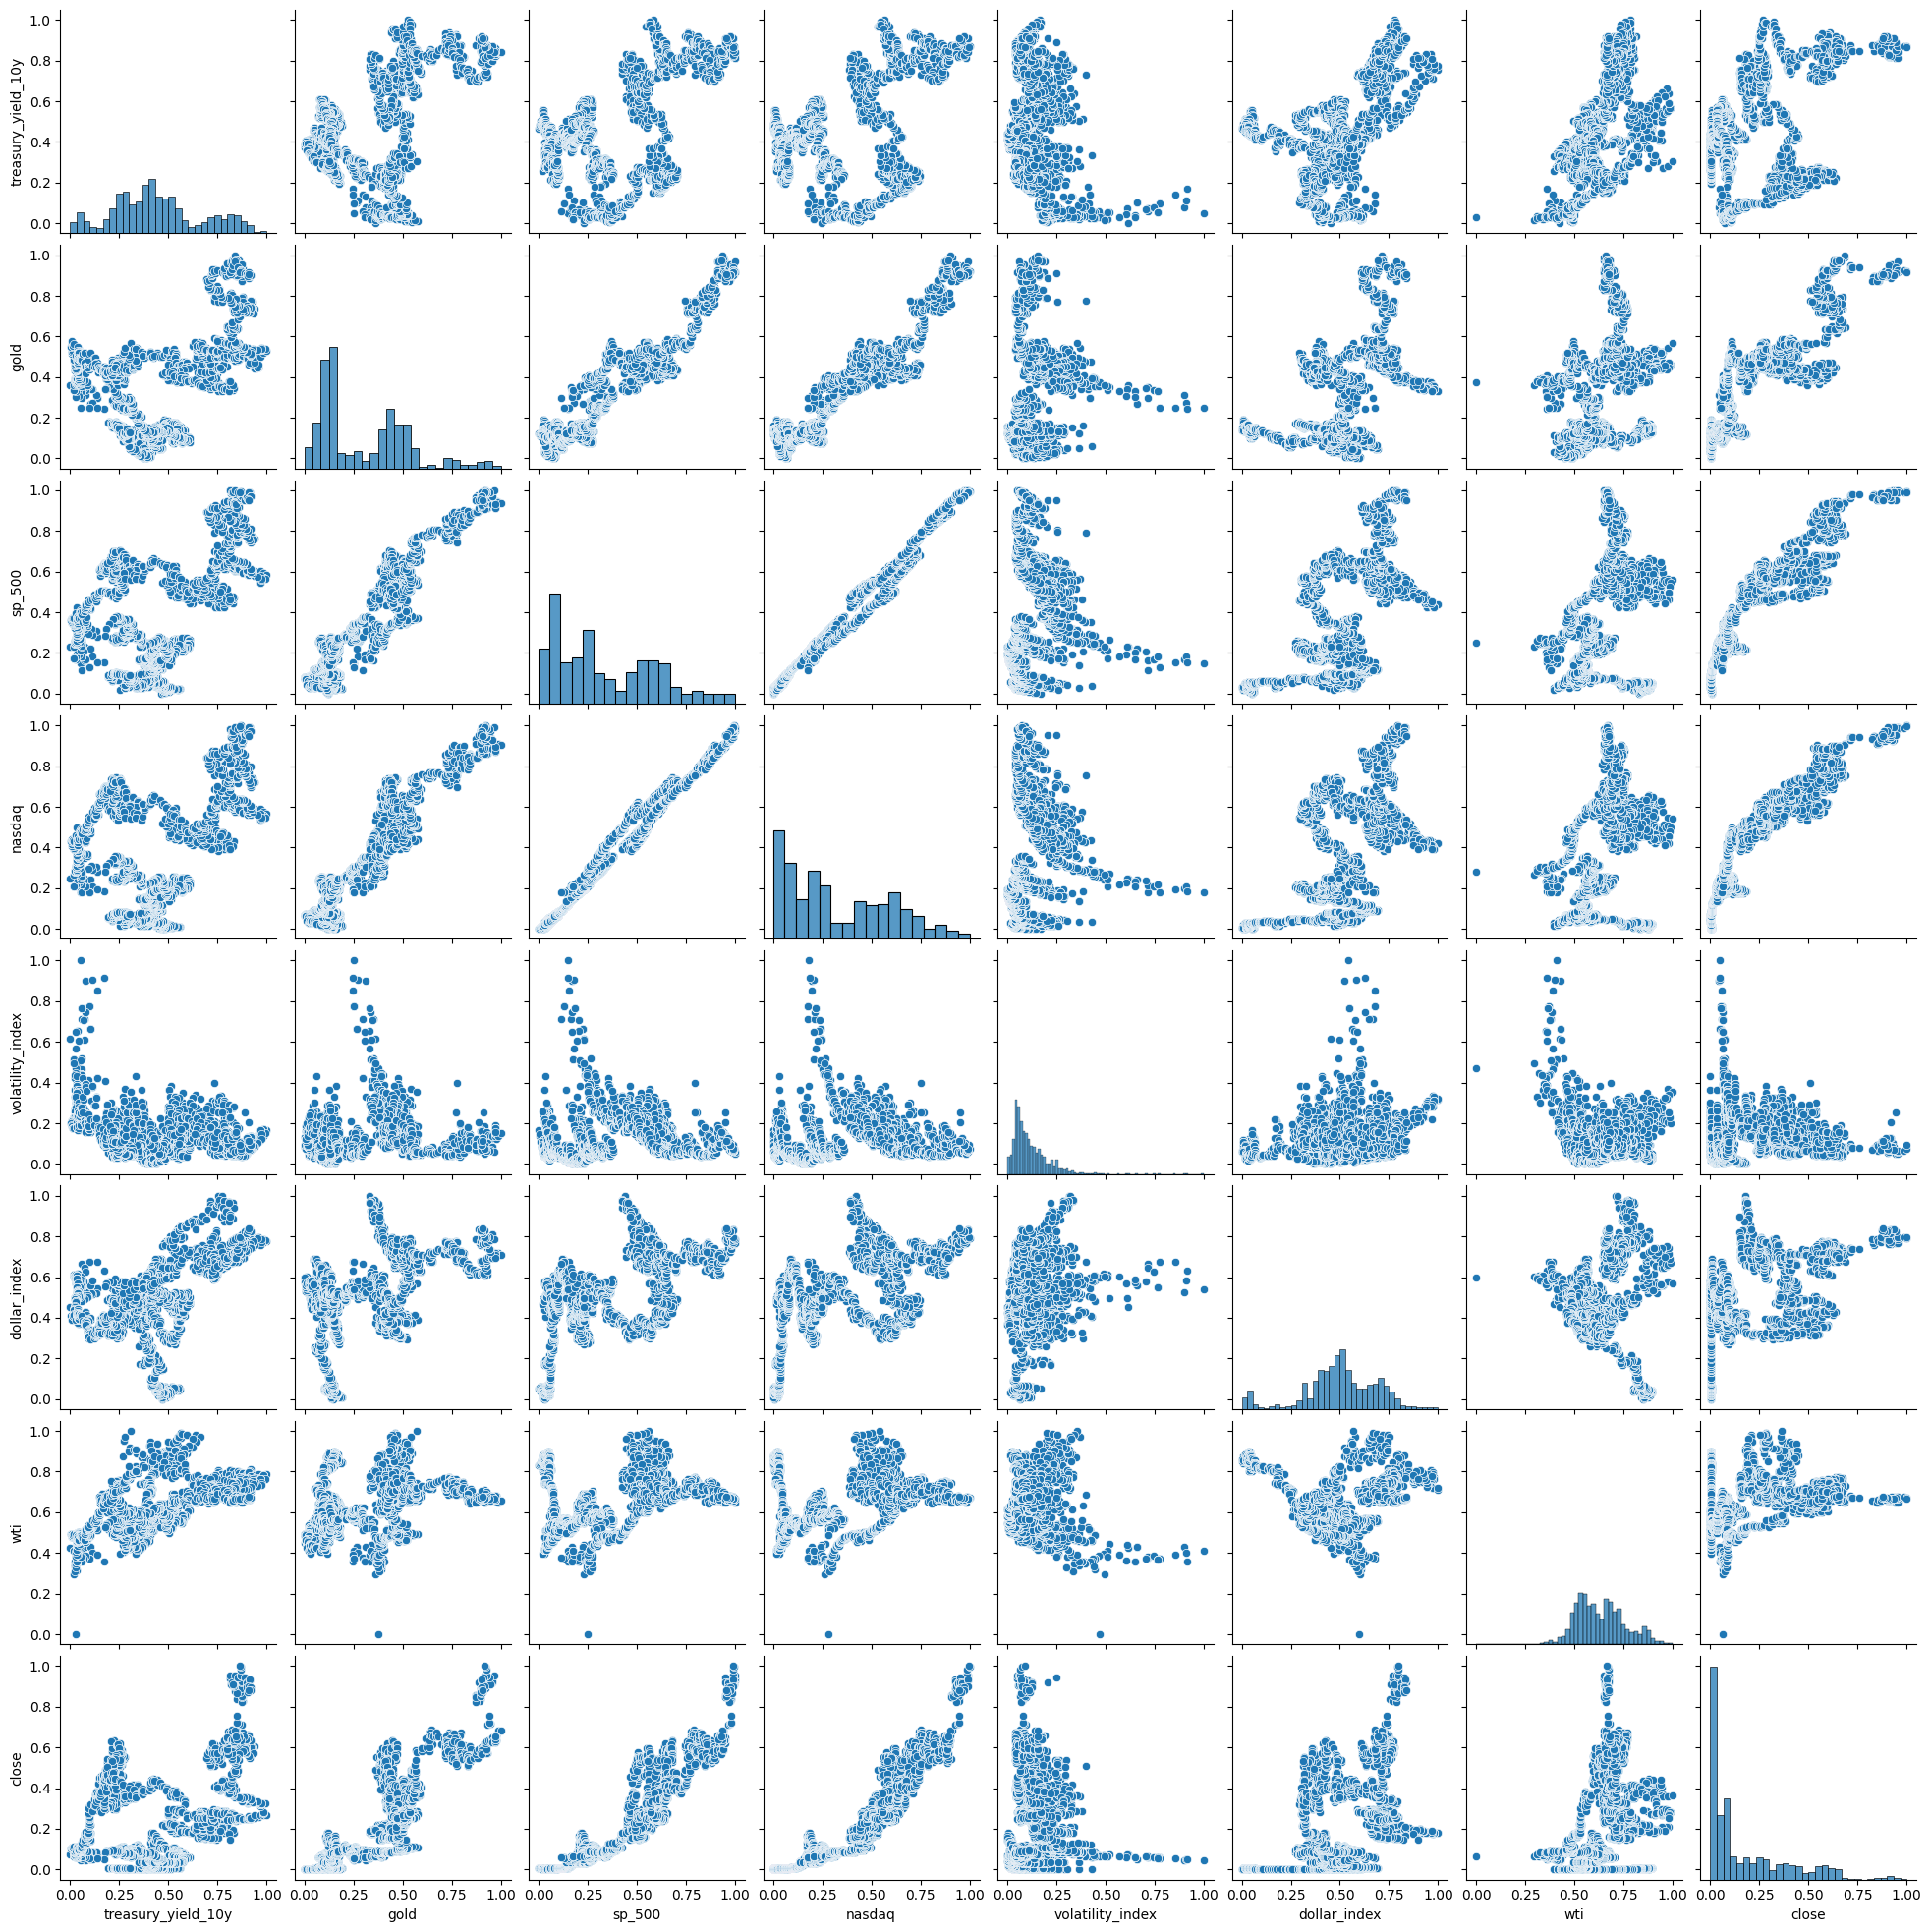

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalizing values in the dataframe, as they have different values
normalized_df = scaler.fit_transform(final_df)
normalized_df = pd.DataFrame(normalized_df, columns=final_df.columns)

# Dropping unnecessary columns for visualization
normalized_df.drop({"volume"}, axis=1, inplace=True)

sns.pairplot(normalized_df)
plt.show()



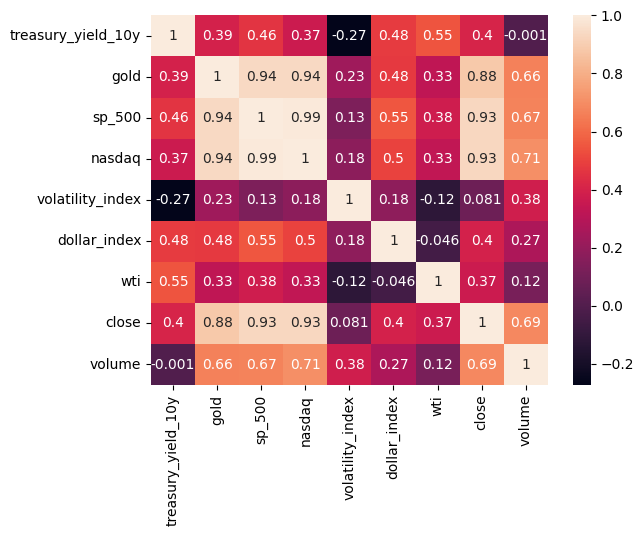

In [17]:
corr = final_df.corr()

sns.heatmap(corr, annot=True)
sns.color_palette("vlag", as_cmap=True)
plt.show()

In [18]:
final_df['day_number'] = final_df.index.weekday

# LSTM model with market data

Splitting data to prevent leaking of future data

In [19]:
train_size = int(len(final_df) * 0.8)
train_data = final_df[:train_size]
test_data = final_df[train_size:]

print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")


Train data shape: (3213, 10)
Test data shape: (804, 10)


In [20]:
# Adding target value with 1 or 0 for up and down
train_data['target'] = train_data['close'].diff().apply(lambda x: 1 if x > 0 else 0)
test_data['target'] = test_data['close'].diff().apply(lambda x: 1 if x > 0 else 0)

train_data["target"] = train_data["target"].shift(-1)
test_data["target"] = test_data["target"].shift(-1)

<ipython-input-20-5149f93ccd4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['target'] = train_data['close'].diff().apply(lambda x: 1 if x > 0 else 0)
<ipython-input-20-5149f93ccd4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['target'] = test_data['close'].diff().apply(lambda x: 1 if x > 0 else 0)
<ipython-input-20-5149f93ccd4e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [21]:
train_data.drop(train_data.index[-1], inplace=True)
test_data.drop(test_data.index[-1], inplace=True)

<ipython-input-21-cc4f939ff3b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(train_data.index[-1], inplace=True)
<ipython-input-21-cc4f939ff3b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(test_data.index[-1], inplace=True)


In [22]:
train_data

,treasury_yield_10y,gold,sp_500,nasdaq,volatility_index,dollar_index,wti,close,volume,day_number,target
2014-01-02,2.985,1225.000000,1831.979980,4143.069824,14.230000,80.629997,95.440002,802.390015,3.848950e+07,3,1.0
2014-01-03,2.995,1238.400024,1831.369995,4131.910156,13.760000,80.790001,93.959999,818.719971,3.781010e+07,4,1.0
2014-01-04,2.995,1238.400024,1831.369995,4131.910156,13.760000,80.790001,93.959999,859.510010,3.800500e+07,5,1.0
2014-01-05,2.995,1238.400024,1831.369995,4131.910156,13.760000,80.790001,93.959999,933.530029,7.289850e+07,6,1.0
2014-01-06,2.961,1237.800049,1826.770020,4113.680176,13.550000,80.650002,93.430000,953.289978,8.556570e+07,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-14,4.010,1641.699951,3583.070068,10321.389648,32.020000,113.309998,85.610001,19185.656700,3.845236e+10,4,0.0
2022-10-15,4.010,1641.699951,3583.070068,10321.389648,32.020000,113.309998,85.610001,19067.635082,1.619224e+10,5,1.0
2022-10-16,4.010,1641.699951,3583.070068,10321.389648,32.020000,113.309998,85.610001,19268.092801,1.798892e+10,6,1.0
2022-10-17,4.015,1657.000000,3677.949951,10675.799805,31.370001,112.040001,85.459999,19550.757300,2.747255e+10,0,0.0


Log transform and normalisation of the datasets

In [23]:
import numpy as np

exclude_columns = ["day_number", "target"]
columns_to_transform = [col for col in train_data.columns if col not in exclude_columns]

for col in columns_to_transform:

  # log transform to make data stationary
  train_data[col] = train_data[col].apply(lambda x: np.log1p(x))
  test_data[col] = test_data[col].apply(lambda x: np.log1p(x))

  # normalize value for differnet scales
  train_data[col] = (train_data[col] - train_data[col].min()) / (train_data[col].max() - train_data[col].min())
  test_data[col] = (test_data[col] - test_data[col].min()) / (test_data[col].max() - test_data[col].min())

<ipython-input-23-60ce30654d9a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col] = train_data[col].apply(lambda x: np.log1p(x))
<ipython-input-23-60ce30654d9a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[col] = test_data[col].apply(lambda x: np.log1p(x))
<ipython-input-23-60ce30654d9a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [24]:
train_data

,treasury_yield_10y,gold,sp_500,nasdaq,volatility_index,dollar_index,wti,close,volume,day_number,target
2014-01-02,0.809631,0.229231,0.049773,0.025815,0.192729,0.050873,0.894117,0.252975,0.221901,3,1.0
2014-01-03,0.811707,0.245491,0.049444,0.023875,0.177877,0.056280,0.887745,0.256366,0.220381,4,1.0
2014-01-04,0.811707,0.245491,0.049444,0.023875,0.177877,0.056280,0.887745,0.264551,0.220820,5,1.0
2014-01-05,0.811707,0.245491,0.049444,0.023875,0.177877,0.056280,0.887745,0.278460,0.276404,6,1.0
2014-01-06,0.804629,0.244767,0.046962,0.020696,0.171088,0.051549,0.885439,0.281987,0.290076,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-14,0.999174,0.666868,0.712010,0.682175,0.559371,0.980740,0.849823,0.787808,0.811299,4,0.0
2022-10-15,0.999174,0.666868,0.712010,0.682175,0.559371,0.980740,0.849823,0.786768,0.737493,5,1.0
2022-10-16,0.999174,0.666868,0.712010,0.682175,0.559371,0.980740,0.849823,0.788531,0.746472,6,1.0
2022-10-17,1.000000,0.680735,0.737814,0.706454,0.549951,0.949887,0.849109,0.790986,0.782606,0,0.0


In [25]:
test_data

,treasury_yield_10y,gold,sp_500,nasdaq,volatility_index,dollar_index,wti,close,volume,day_number,target
2022-10-20,0.592689,0.003989,0.000000,0.056651,0.782259,0.996424,0.757331,0.098687,0.457661,3,1.0
2022-10-21,0.585235,0.026843,0.046186,0.090156,0.773892,0.933944,0.726578,0.101946,0.542167,4,1.0
2022-10-22,0.585235,0.026843,0.046186,0.090156,0.773892,0.933944,0.726578,0.102923,0.331805,5,1.0
2022-10-23,0.585235,0.026843,0.046186,0.090156,0.773892,0.933944,0.726578,0.112636,0.427183,6,0.0
2022-10-24,0.597266,0.024255,0.069453,0.102668,0.778518,0.932502,0.710909,0.106663,0.520536,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,0.788288,0.897536,0.982886,0.988777,0.179232,0.649314,0.161234,0.946183,0.653616,3,0.0
2024-12-27,0.809667,0.882273,0.960985,0.966720,0.245693,0.639604,0.200661,0.937173,0.686021,4,1.0
2024-12-28,0.809667,0.882273,0.960985,0.966720,0.245693,0.639604,0.200661,0.942712,0.452887,5,0.0
2024-12-29,0.809667,0.882273,0.960985,0.966720,0.245693,0.639604,0.200661,0.933625,0.514855,6,0.0


Model creation

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional, BatchNormalization

def create_model(X_train):
  model = Sequential()

  # Model layers
  model.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(LSTM(units=64, return_sequences=True))
  model.add(LSTM(units=128, return_sequences=False))
  model.add(Dense(units=128, activation="relu"))
  model.add(Dense(units=64, activation="relu"))
  model.add(Dense(units=32, activation="relu"))
  model.add(Dense(units=1, activation="sigmoid"))

  model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
  return model

Sequence function for windows

In [27]:
import numpy as np

def create_sequences(data, feature_cols, target_col, window_size=60):
    X, y = [], []

    for i in range(len(data) - window_size):
        # Range of data for this window
        seq_x = data[feature_cols].iloc[i:i+window_size].values
        # Target is the "day after the window"
        seq_y = data[target_col].iloc[i+window_size]

        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

In [30]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

<ipython-input-30-059e89aa030d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.dropna(inplace=True)
<ipython-input-30-059e89aa030d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.dropna(inplace=True)


Training loop

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

# Intial set up
window_sizes = list(range(10, 101, 10))
batch_sizes = [16, 32, 64, 128]
results = pd.DataFrame(columns=["model", "window_size", "batch_size", "train_accuracy", "val_accuracy", "X_test", "y_test"])
feature_cols = [col for col in train_data.columns if col != "target"]
target_col = "target"


for window_size in window_sizes:
  for batch_size in batch_sizes:

    # Creation of the sequences according to window size
    X_train, y_train = create_sequences(
        data=train_data,
        feature_cols=feature_cols,
        target_col=target_col,
        window_size=window_size
    )
    X_test, y_test = create_sequences(
        data=test_data,
        feature_cols=feature_cols,
        target_col=target_col,
        window_size=window_size
    )

    # Early stopping in case if validation loss doesn't change in 15 epochs
    early_stop = EarlyStopping(
      monitor='val_loss',
      patience=15,
      restore_best_weights=True  # Restore model weights from the best epoch
    )


    # Model creation with different split data
    model = create_model(X_train)

    # Training configuration with different batch sizes
    history = model.fit(
        X_train, y_train,
        epochs=30,
        batch_size=batch_size,
        shuffle=False,
        validation_split=0.1,
        callbacks=[early_stop]
    )

    # Saving results
    train_acc = max(history.history["accuracy"])
    val_acc   = max(history.history["val_accuracy"])

    row_dict = {
            "model": model,
            "window_size": window_size,
            "batch_size": batch_size,
            "train_accuracy": train_acc,
            "val_accuracy": val_acc,
            "X_test" : X_test,
            "y_test" : y_test
        }

    # Creating row dataframe
    temp_df = pd.DataFrame([row_dict])

    # Concatenate with the main results DataFrame
    results = pd.concat([results, temp_df], ignore_index=True)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5440 - loss: 0.6921 - val_accuracy: 0.4673 - val_loss: 0.6995
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5032 - loss: 0.6936 - val_accuracy: 0.4673 - val_loss: 0.6989
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5086 - loss: 0.6938 - val_accuracy: 0.4673 - val_loss: 0.6987
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5086 - loss: 0.6941 - val_accuracy: 0.4673 - val_loss: 0.6990
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4992 - loss: 0.6939 - val_accuracy: 0.4673 - val_loss: 0.6992
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4967 - loss: 0.6939 - val_accuracy: 0.4673 - val_loss: 0.7004
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5086 - loss: 0.6941 - val_accuracy: 0.4673 - val_loss: 0.7004
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5086 - loss: 0.6945 - val_accuracy: 0.4673 - v

<ipython-input-48-172331560d2b>:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, temp_df], ignore_index=True)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5460 - loss: 0.6913 - val_accuracy: 0.4673 - val_loss: 0.6987
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5089 - loss: 0.6938 - val_accuracy: 0.4673 - val_loss: 0.6982
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5043 - loss: 0.6939 - val_accuracy: 0.4673 - val_loss: 0.6982
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5089 - loss: 0.6934 - val_accuracy: 0.4673 - val_loss: 0.6992
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5089 - loss: 0.6946 - val_accuracy: 0.4673 - val_loss: 0.6999
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5089 - loss: 0.6943 - val_accuracy: 0.4673 - val_loss: 0.6994
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5089 - loss: 0.6941 - val_accuracy: 0.4673 - val_loss: 0.7008
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5013 - loss: 0.6939 - val_accuracy: 0.4673 - val_loss: 0.6987


KeyboardInterrupt: 

In [33]:
results

,model,window_size,batch_size,train_accuracy,val_accuracy,X_test,y_test
0,"<Sequential name=sequential_2, built=True>",16,32,0.534957,0.468750,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ..."
1,"<Sequential name=sequential_3, built=True>",16,64,0.534957,0.468750,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ..."
2,"<Sequential name=sequential_4, built=True>",16,128,0.549565,0.503125,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ..."
3,"<Sequential name=sequential_5, built=True>",32,32,0.541769,0.468553,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ..."
4,"<Sequential name=sequential_6, built=True>",32,64,0.535477,0.468553,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ..."
5,"<Sequential name=sequential_7, built=True>",32,128,0.535477,0.468553,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ..."
6,"<Sequential name=sequential_8, built=True>",64,32,0.537782,0.466667,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, ..."
7,"<Sequential name=sequential_9, built=True>",64,64,0.537782,0.466667,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, ..."
8,"<Sequential name=sequential_10, built=True>",64,128,0.545551,0.466667,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, ..."
9,"<Sequential name=sequential_11, built=True>",128,32,0.539654,0.469256,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."


In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

results["final_accuracy"] = None
from sklearn.metrics import accuracy_score

def compute_accuracy(model, X_test, y_test):

    # Predicts probability
    y_prob = model.predict(X_test)  # shape: (num_samples, 1)

    # If you need actual class labels (0 or 1):
    y_pred = (y_prob >= 0.5).astype(int)
    # Calculate accuracy
    return accuracy_score(y_test, y_pred)

for idx, row in results.iterrows():
    # Grab the trained model from the row
    model = row['model']

    X_test = results["X_test"][idx]
    y_test = results["y_test"][idx]
    # Compute accuracy
    acc = compute_accuracy(model, X_test, y_test)

    # Save to 'final_accuracy' column
    results.at[idx, 'final_accuracy'] = acc

results_highest = results.sort_values(by="final_accuracy", ascending=False)
results_highest

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


,model,window_size,batch_size,train_accuracy,val_accuracy,X_test,y_test,final_accuracy
6,"<Sequential name=sequential_8, built=True>",64,32,0.537782,0.466667,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...",0.508796
7,"<Sequential name=sequential_9, built=True>",64,64,0.537782,0.466667,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...",0.508796
8,"<Sequential name=sequential_10, built=True>",64,128,0.545551,0.466667,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...",0.508796
9,"<Sequential name=sequential_11, built=True>",128,32,0.539654,0.469256,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0.508148
10,"<Sequential name=sequential_12, built=True>",128,64,0.539654,0.469256,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0.508148
11,"<Sequential name=sequential_13, built=True>",128,128,0.546143,0.469256,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0.508148
3,"<Sequential name=sequential_5, built=True>",32,32,0.541769,0.468553,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",0.50454
4,"<Sequential name=sequential_6, built=True>",32,64,0.535477,0.468553,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",0.50454
5,"<Sequential name=sequential_7, built=True>",32,128,0.535477,0.468553,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",0.50454
0,"<Sequential name=sequential_2, built=True>",16,32,0.534957,0.468750,"[[[0.592688739156456, 0.0039886145346106, 0.0,...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",0.501906
